Sample Data:
     Price  Area  Bedrooms  Bathrooms  Age  LocationScore  DaysOnMarket
0  221958  3885         4          1   23       7.259645           161
1  771155  4617         4          1   36       2.253983           324
2  231932  3404         4          1   34       6.439756           383
3  465838   974         5          3   43       5.858570           169
4  359178  1582         3          1   39       2.827551           105


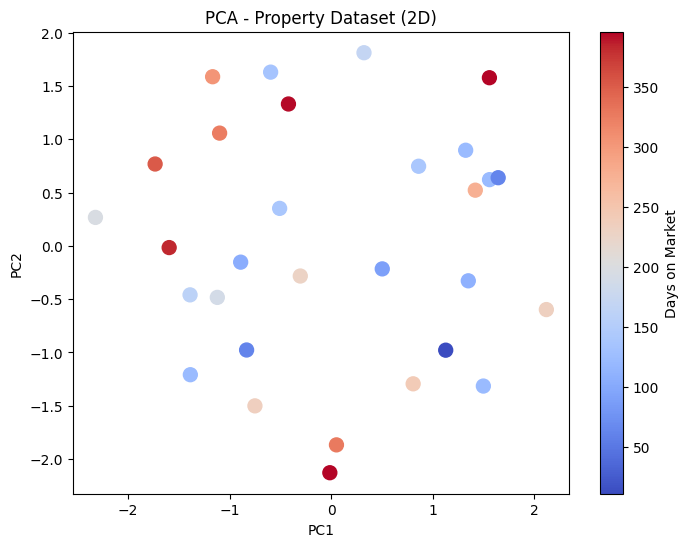

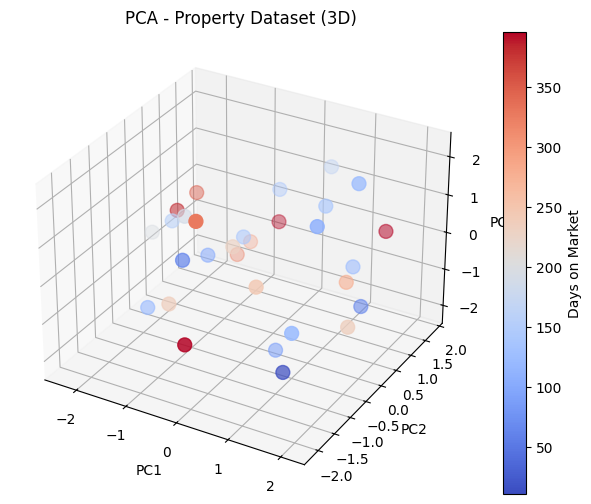

Explained Variance Ratio: [0.24705334 0.19543591 0.18114952]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Simulate property dataset
np.random.seed(42)
data = {
    'Price': np.random.randint(100000, 1000000, 30),
    'Area': np.random.randint(500, 5000, 30),
    'Bedrooms': np.random.randint(1, 6, 30),
    'Bathrooms': np.random.randint(1, 4, 30),
    'Age': np.random.randint(0, 50, 30),
    'LocationScore': np.random.uniform(1, 10, 30),
    'DaysOnMarket': np.random.randint(10, 400, 30)  # Target variable insight
}

df = pd.DataFrame(data)
print("Sample Data:\n", df.head())

# Step 2: Standardize features
features = ['Price', 'Area', 'Bedrooms', 'Bathrooms', 'Age', 'LocationScore']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Step 4: 2D Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['DaysOnMarket'], cmap='coolwarm', s=100)
plt.colorbar(label='Days on Market')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Property Dataset (2D)')
plt.show()

# Step 5: 3D Scatter plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=df['DaysOnMarket'], cmap='coolwarm', s=100)
plt.colorbar(sc, label='Days on Market')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA - Property Dataset (3D)')
plt.show()

# Step 6: Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
